In [1]:
from pathlib import Path
import datetime
import pandas as pd
import numpy as np
import xarray as xr
import dask
import dask.bag as db

import motrainer

In [2]:
ds = xr.open_zarr('data/data.zarr')
ds

<xarray.Dataset>
Dimensions:  (time: 24, space: 1283)
Coordinates:
  * space    (space) int64 1526157 1526199 1526200 ... 1566881 1566913 1566965
  * time     (time) datetime64[ns] 2017-05-07 2017-05-13 ... 2017-09-28
Data variables:
    CR       (time, space) float64 dask.array<chunksize=(24, 300), meta=np.ndarray>
    CWAD     (time, space) float64 dask.array<chunksize=(24, 300), meta=np.ndarray>
    LAI      (time, space) float64 dask.array<chunksize=(24, 300), meta=np.ndarray>
    SWTD     (time, space) float64 dask.array<chunksize=(24, 300), meta=np.ndarray>
    SWTD6    (time, space) float64 dask.array<chunksize=(24, 300), meta=np.ndarray>

In [3]:
ds.mot.is_valid()

True

(array([  2.,   0.,   3.,   6.,  68., 158., 350., 323., 333.,  40.]),
 array([2.22666667, 2.28225   , 2.33783333, 2.39341667, 2.449     ,
        2.50458333, 2.56016667, 2.61575   , 2.67133333, 2.72691667,
        2.7825    ]),
 <BarContainer object of 10 artists>)

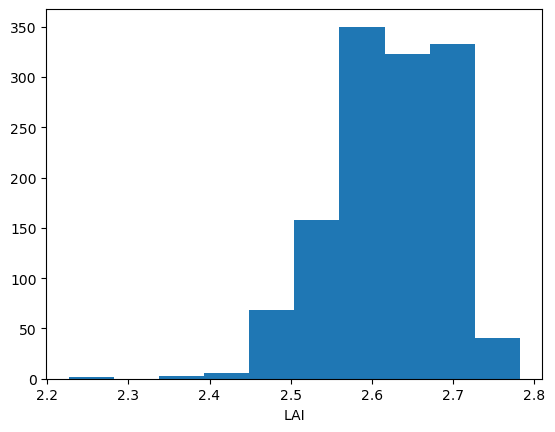

In [4]:
ds['LAI'].mean(dim="time").plot.hist()

In [5]:
cls_space = np.digitize(ds['LAI'].mean(dim="time"), np.arange(2.2, 2.8, 0.1))
cls_time = np.digitize(ds['LAI'].mean(dim="space"), np.arange(2.2, 2.8, 0.1))

In [6]:
# Different choices of split
identifier_str_false = 'ids'
identifier_str = 'space'
identifier_1d = {"space": cls_space}
identifier_2d = {"space": cls_space, "time": cls_time}

In [7]:
# bags = ds.mot.model_split(identifier_1d)
bags = ds.mot.model_split(identifier_2d)
# bags = ds.mot.model_split(identifier_str)


In [8]:
bags.compute()

[<xarray.Dataset>
 Dimensions:   (samples: 5382)
 Coordinates:
     space     (samples) int64 1526157 1526157 1526157 ... 1566663 1566663
     time      (samples) datetime64[ns] 2017-05-07 2017-05-13 ... 2017-06-24
   * samples   (samples) object MultiIndex
   * space_id  (samples) int64 5 5 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5 5 5
   * time_id   (samples) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
 Data variables:
     CR        (samples) float64 dask.array<chunksize=(1242,), meta=np.ndarray>
     CWAD      (samples) float64 dask.array<chunksize=(1242,), meta=np.ndarray>
     LAI       (samples) float64 dask.array<chunksize=(1242,), meta=np.ndarray>
     SWTD      (samples) float64 dask.array<chunksize=(1242,), meta=np.ndarray>
     SWTD6     (samples) float64 dask.array<chunksize=(1242,), meta=np.ndarray>,
 <xarray.Dataset>
 Dimensions:   (samples: 598)
 Coordinates:
     space     (samples) int64 1526157 1526429 1526442 ... 1566624 1566663
     time      (samples) 